In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
hub = pd.read_csv('hub_data_1.csv')

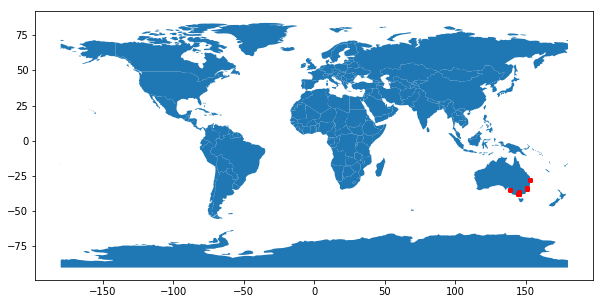

In [3]:
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame



geometry = [Point(xy) for xy in zip(hub['Longitude'], hub['Latitude'])]
gdf = GeoDataFrame(hub, geometry=geometry)   


world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax=world.plot(figsize=(10, 6)), marker='o', color='red', markersize=15);

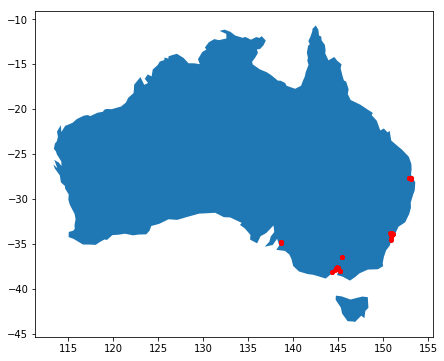

In [4]:
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame



geometry = [Point(xy) for xy in zip(hub['Longitude'], hub['Latitude'])]
gdf = GeoDataFrame(hub, geometry=geometry)   


world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
aus = world[world.name=='Australia']
gdf.plot(ax=aus.plot(figsize=(10, 6)), marker='o', color='red', markersize=15);

In [5]:
hub.head()

,Hub ID,School Name,Location Coordinates,Latitude,Longitude,geometry
0,CH00084,Banksia Road Public School,-33.9068 | 151.05015,-33.90680,151.05015,POINT (151.05015 -33.90680)
1,CH00001,Fernbrooke State School,-27.65852 | 152.83998,-27.65852,152.83998,POINT (152.83998 -27.65852)
2,CH00003,Riverview State School,-27.6046 | 152.84662,-27.60460,152.84662,POINT (152.84662 -27.60460)
3,CH00004,Staines Memorial College,-27.66902 | 152.84945,-27.66902,152.84945,POINT (152.84945 -27.66902)
4,CH00005,Marsden State School,-27.68563 | 153.10479,-27.68563,153.10479,POINT (153.10479 -27.68563)


In [6]:
type(hub)

pandas.core.frame.DataFrame

In [7]:
hub_geo = GeoDataFrame(hub)

In [8]:
import folium

In [9]:
m = folium.Map([-37.8136, 144.9631], zoom_start = 4.5)
m

In [10]:
for index, row in hub.iterrows():
    folium.Marker([row['Latitude'], row['Longitude']],
              tooltip=row['School Name'],              
             ).add_to(m)

In [11]:
m

In [12]:
school_profile = pd.read_csv('school_profile_1.csv')

In [13]:
school_profile.head()

,Calendar Year,ACARA SML ID,AGE ID,School Name,Suburb,State,Postcode,School Sector,School Type,Campus Type,...,Teaching Staff,Full Time Equivalent Teaching Staff,Non-Teaching Staff,Full Time Equivalent Non-Teaching Staff,Total Enrolments,Girls Enrolments,Boys Enrolments,Full Time Equivalent Enrolments,Indigenous Enrolments (%),Language Background Other Than English (%)
0,2008,40000,3.0,Corpus Christi Catholic School,Bellerive,TAS,7018,Catholic,Primary,School Single Entity,...,29.0,19.0,12.0,6.9,410.0,185.0,225.0,410.0,1.0,4.0
1,2009,40000,3.0,Corpus Christi Catholic School,Bellerive,TAS,7018,Catholic,Primary,School Single Entity,...,27.0,19.1,15.0,8.7,409.0,184.0,225.0,409.0,2.0,4.0
2,2010,40000,3.0,Corpus Christi Catholic School,Bellerive,TAS,7018,Catholic,Primary,School Single Entity,...,26.0,18.6,18.0,10.2,392.0,173.0,219.0,392.0,2.0,4.0
3,2011,40000,3.0,Corpus Christi Catholic School,Bellerive,TAS,7018,Catholic,Primary,School Single Entity,...,25.0,18.1,16.0,9.0,385.0,173.0,212.0,385.0,0.0,3.0
4,2012,40000,3.0,Corpus Christi Catholic School,Bellerive,TAS,7018,Catholic,Primary,School Single Entity,...,24.0,18.1,16.0,9.4,391.0,185.0,206.0,391.0,1.0,3.0


In [14]:
year = list(school_profile['Calendar Year'].unique())

In [15]:
year

[2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]

In [16]:
school_profile[(school_profile['School Name']=='Corpus Christi Catholic School') & (school_profile['Calendar Year']==2008)]

,Calendar Year,ACARA SML ID,AGE ID,School Name,Suburb,State,Postcode,School Sector,School Type,Campus Type,...,Teaching Staff,Full Time Equivalent Teaching Staff,Non-Teaching Staff,Full Time Equivalent Non-Teaching Staff,Total Enrolments,Girls Enrolments,Boys Enrolments,Full Time Equivalent Enrolments,Indigenous Enrolments (%),Language Background Other Than English (%)
0,2008,40000,3.0,Corpus Christi Catholic School,Bellerive,TAS,7018,Catholic,Primary,School Single Entity,...,29.0,19.0,12.0,6.9,410.0,185.0,225.0,410.0,1.0,4.0


In [17]:
school_profile[school_profile['Calendar Year']==2008]

,Calendar Year,ACARA SML ID,AGE ID,School Name,Suburb,State,Postcode,School Sector,School Type,Campus Type,...,Teaching Staff,Full Time Equivalent Teaching Staff,Non-Teaching Staff,Full Time Equivalent Non-Teaching Staff,Total Enrolments,Girls Enrolments,Boys Enrolments,Full Time Equivalent Enrolments,Indigenous Enrolments (%),Language Background Other Than English (%)
0,2008,40000,3.0,Corpus Christi Catholic School,Bellerive,TAS,7018,Catholic,Primary,School Single Entity,...,29.0,19.0,12.0,6.9,410.0,185.0,225.0,410.0,1.0,4.0
11,2008,40001,4.0,Fahan School,Sandy Bay,TAS,7005,Independent,Combined,School Single Entity,...,34.0,31.0,23.0,14.6,347.0,339.0,8.0,347.0,1.0,1.0
22,2008,40002,5.0,Geneva Christian College,Latrobe,TAS,7307,Independent,Combined,School Single Entity,...,10.0,5.8,13.0,5.0,76.0,43.0,33.0,75.4,7.0,0.0
33,2008,40003,7.0,Holy Rosary Catholic School,Claremont,TAS,7011,Catholic,Primary,School Single Entity,...,12.0,12.0,13.0,5.8,329.0,144.0,185.0,329.0,2.0,0.0
44,2008,40004,9.0,Immaculate Heart of Mary Catholic School,Lenah Valley,TAS,7008,Catholic,Primary,School Single Entity,...,16.0,10.8,10.0,4.0,168.0,84.0,84.0,168.0,5.0,6.0
55,2008,40005,10.0,John Calvin School,Launceston,TAS,7250,Independent,Combined,School Single Entity,...,13.0,7.0,4.0,2.0,61.0,30.0,31.0,61.0,0.0,0.0
66,2008,40006,11.0,Larmenier Catholic School,St Leonards,TAS,7250,Catholic,Primary,School Single Entity,...,19.0,13.4,0.0,0.0,192.0,85.0,107.0,192.0,2.0,NaN
77,2008,40007,12.0,Launceston Church Grammar School,Mowbray,TAS,7248,Independent,Combined,School Head Campus,...,102.0,75.5,68.0,45.0,818.0,383.0,435.0,818.0,1.0,7.0
88,2008,40008,13.0,St James Catholic College,Cygnet,TAS,7112,Catholic,Combined,School Single Entity,...,25.0,21.1,18.0,9.4,259.0,130.0,129.0,259.0,29.0,0.0
99,2008,40009,18.0,Our Lady of Lourdes Catholic School,Devonport,TAS,7310,Catholic,Primary,School Single Entity,...,21.0,17.3,8.0,4.0,346.0,176.0,170.0,346.0,3.0,2.0


In [18]:
school_profile[school_profile['School Name']=='Corpus Christi Catholic School']

,Calendar Year,ACARA SML ID,AGE ID,School Name,Suburb,State,Postcode,School Sector,School Type,Campus Type,...,Teaching Staff,Full Time Equivalent Teaching Staff,Non-Teaching Staff,Full Time Equivalent Non-Teaching Staff,Total Enrolments,Girls Enrolments,Boys Enrolments,Full Time Equivalent Enrolments,Indigenous Enrolments (%),Language Background Other Than English (%)
0,2008,40000,3.0,Corpus Christi Catholic School,Bellerive,TAS,7018,Catholic,Primary,School Single Entity,...,29.0,19.0,12.0,6.9,410.0,185.0,225.0,410.0,1.0,4.0
1,2009,40000,3.0,Corpus Christi Catholic School,Bellerive,TAS,7018,Catholic,Primary,School Single Entity,...,27.0,19.1,15.0,8.7,409.0,184.0,225.0,409.0,2.0,4.0
2,2010,40000,3.0,Corpus Christi Catholic School,Bellerive,TAS,7018,Catholic,Primary,School Single Entity,...,26.0,18.6,18.0,10.2,392.0,173.0,219.0,392.0,2.0,4.0
3,2011,40000,3.0,Corpus Christi Catholic School,Bellerive,TAS,7018,Catholic,Primary,School Single Entity,...,25.0,18.1,16.0,9.0,385.0,173.0,212.0,385.0,0.0,3.0
4,2012,40000,3.0,Corpus Christi Catholic School,Bellerive,TAS,7018,Catholic,Primary,School Single Entity,...,24.0,18.1,16.0,9.4,391.0,185.0,206.0,391.0,1.0,3.0
5,2013,40000,3.0,Corpus Christi Catholic School,Bellerive,TAS,7018,Catholic,Primary,School Single Entity,...,25.0,18.0,17.0,9.9,388.0,185.0,203.0,388.0,1.0,4.0
6,2014,40000,3.0,Corpus Christi Catholic School,Bellerive,TAS,7018,Catholic,Primary,School Single Entity,...,26.0,18.6,17.0,9.6,387.0,193.0,194.0,387.0,2.0,3.0
7,2015,40000,3.0,Corpus Christi Catholic School,Bellerive,TAS,7018,Catholic,Primary,School Single Entity,...,26.0,20.3,18.0,10.6,395.0,193.0,202.0,395.0,2.0,2.0
8,2016,40000,3.0,Corpus Christi Catholic School,Bellerive,TAS,7018,Catholic,Primary,School Single Entity,...,29.0,20.8,16.0,9.7,398.0,194.0,204.0,398.0,2.0,1.0
9,2017,40000,3.0,Corpus Christi Catholic School,Bellerive,TAS,7018,Catholic,Primary,School Single Entity,...,29.0,20.4,16.0,9.4,399.0,194.0,205.0,399.0,2.0,1.0


In [19]:
school_profile['unique_col'] = school_profile['School Name'].astype(str) + school_profile['Postcode'].astype(str) + school_profile['Suburb']

In [20]:
school_profile.dtypes

Calendar Year                                   int64
ACARA SML ID                                    int64
AGE ID                                        float64
School Name                                    object
Suburb                                         object
State                                          object
Postcode                                        int64
School Sector                                  object
School Type                                    object
Campus Type                                    object
Rolled Reporting Description                   object
School URL                                     object
Governing Body                                 object
Governing Body URL                             object
Year Range                                     object
Geolocation                                    object
ICSEA                                         float64
Bottom SEA Quarter (%)                        float64
Lower Middle SEA Quarter (%)

In [21]:
school_profile[school_profile['Calendar Year'] == 2008]

,Calendar Year,ACARA SML ID,AGE ID,School Name,Suburb,State,Postcode,School Sector,School Type,Campus Type,...,Full Time Equivalent Teaching Staff,Non-Teaching Staff,Full Time Equivalent Non-Teaching Staff,Total Enrolments,Girls Enrolments,Boys Enrolments,Full Time Equivalent Enrolments,Indigenous Enrolments (%),Language Background Other Than English (%),unique_col
0,2008,40000,3.0,Corpus Christi Catholic School,Bellerive,TAS,7018,Catholic,Primary,School Single Entity,...,19.0,12.0,6.9,410.0,185.0,225.0,410.0,1.0,4.0,Corpus Christi Catholic School7018Bellerive
11,2008,40001,4.0,Fahan School,Sandy Bay,TAS,7005,Independent,Combined,School Single Entity,...,31.0,23.0,14.6,347.0,339.0,8.0,347.0,1.0,1.0,Fahan School7005Sandy Bay
22,2008,40002,5.0,Geneva Christian College,Latrobe,TAS,7307,Independent,Combined,School Single Entity,...,5.8,13.0,5.0,76.0,43.0,33.0,75.4,7.0,0.0,Geneva Christian College7307Latrobe
33,2008,40003,7.0,Holy Rosary Catholic School,Claremont,TAS,7011,Catholic,Primary,School Single Entity,...,12.0,13.0,5.8,329.0,144.0,185.0,329.0,2.0,0.0,Holy Rosary Catholic School7011Claremont
44,2008,40004,9.0,Immaculate Heart of Mary Catholic School,Lenah Valley,TAS,7008,Catholic,Primary,School Single Entity,...,10.8,10.0,4.0,168.0,84.0,84.0,168.0,5.0,6.0,Immaculate Heart of Mary Catholic School7008Le...
55,2008,40005,10.0,John Calvin School,Launceston,TAS,7250,Independent,Combined,School Single Entity,...,7.0,4.0,2.0,61.0,30.0,31.0,61.0,0.0,0.0,John Calvin School7250Launceston
66,2008,40006,11.0,Larmenier Catholic School,St Leonards,TAS,7250,Catholic,Primary,School Single Entity,...,13.4,0.0,0.0,192.0,85.0,107.0,192.0,2.0,NaN,Larmenier Catholic School7250St Leonards
77,2008,40007,12.0,Launceston Church Grammar School,Mowbray,TAS,7248,Independent,Combined,School Head Campus,...,75.5,68.0,45.0,818.0,383.0,435.0,818.0,1.0,7.0,Launceston Church Grammar School7248Mowbray
88,2008,40008,13.0,St James Catholic College,Cygnet,TAS,7112,Catholic,Combined,School Single Entity,...,21.1,18.0,9.4,259.0,130.0,129.0,259.0,29.0,0.0,St James Catholic College7112Cygnet
99,2008,40009,18.0,Our Lady of Lourdes Catholic School,Devonport,TAS,7310,Catholic,Primary,School Single Entity,...,17.3,8.0,4.0,346.0,176.0,170.0,346.0,3.0,2.0,Our Lady of Lourdes Catholic School7310Devonport


In [22]:
school_2008 = school_profile[school_profile['Calendar Year'] == 2008]

In [23]:
import seaborn as sns

In [24]:
list_params = ['ICSEA','Bottom SEA Quarter (%)','Lower Middle SEA Quarter (%)','Upper Middle SEA Quarter (%)','Top SEA Quarter (%)','Teaching Staff','Full Time Equivalent Teaching Staff','Non-Teaching Staff','Full Time Equivalent Non-Teaching Staff','Total Enrolments','Girls Enrolments','Boys Enrolments','Full Time Equivalent Enrolments','Indigenous Enrolments (%)','Language Background Other Than English (%)']

Plotting for -----  ICSEA


C:\Users\Rishabh\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\Rishabh\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


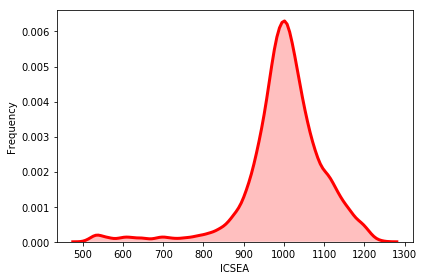

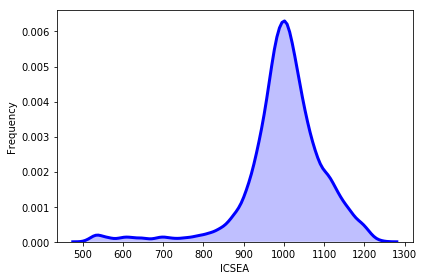

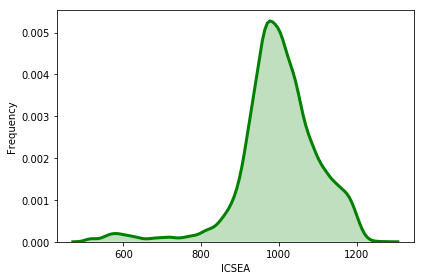

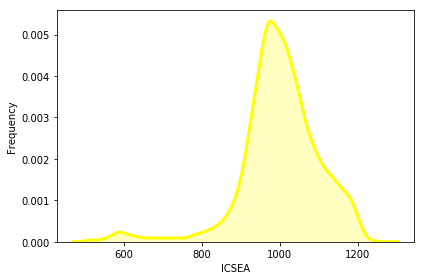

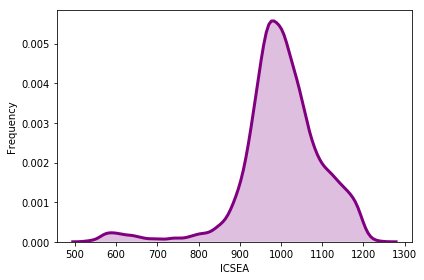

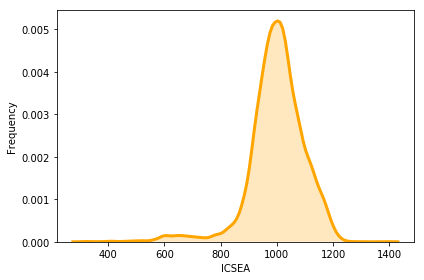

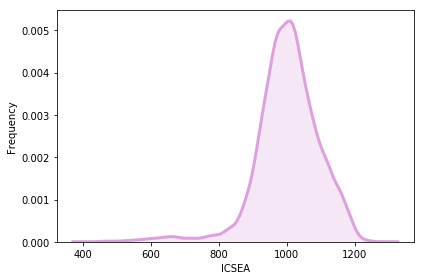

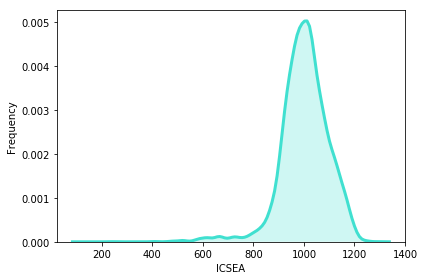

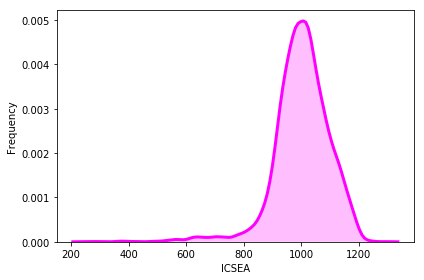

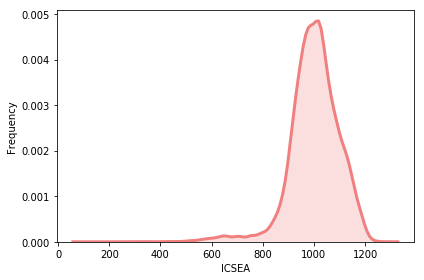

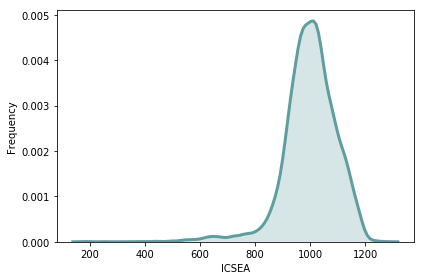

Plotting for -----  Bottom SEA Quarter (%)


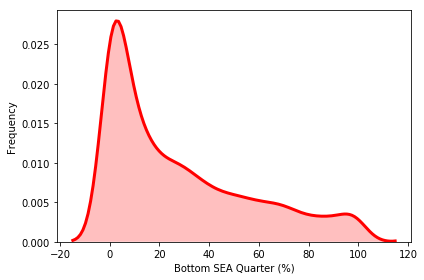

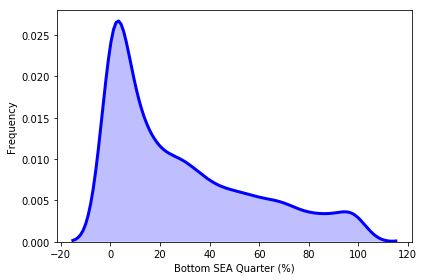

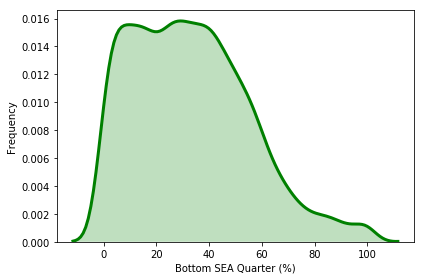

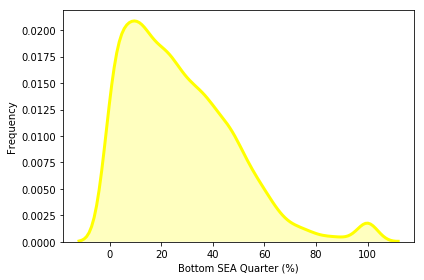

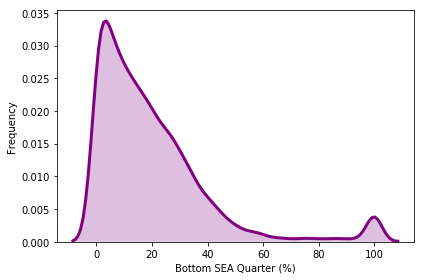

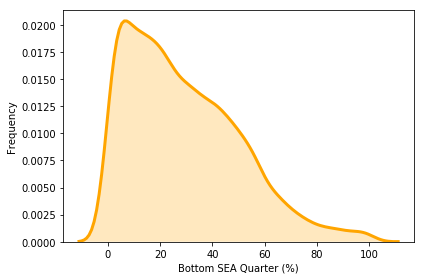

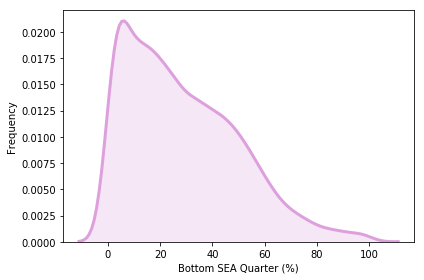

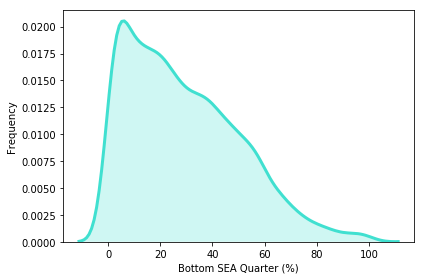

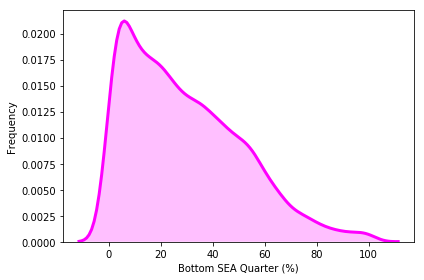

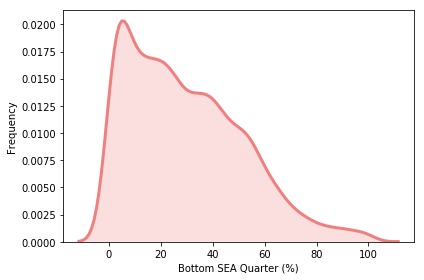

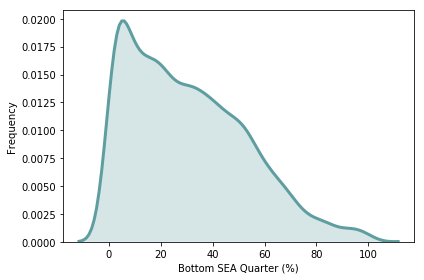

Plotting for -----  Lower Middle SEA Quarter (%)


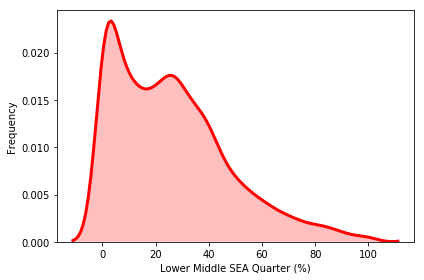

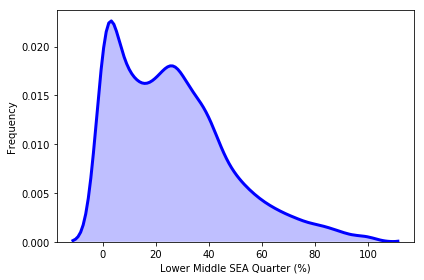

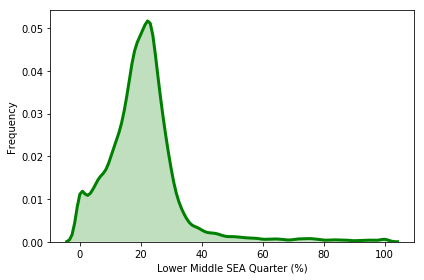

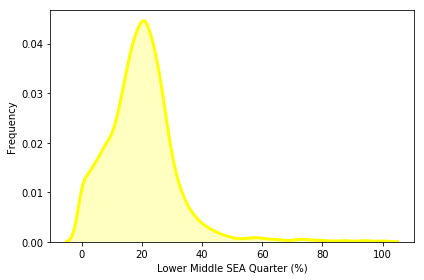

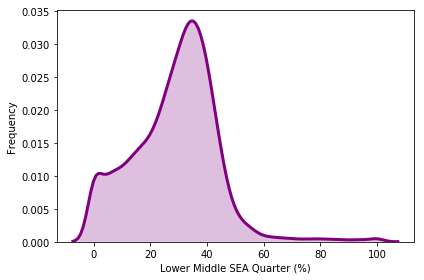

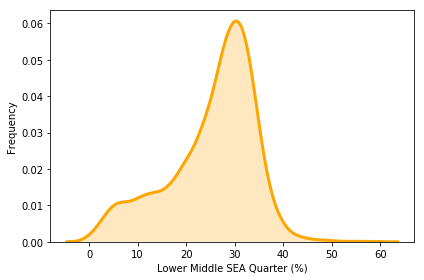

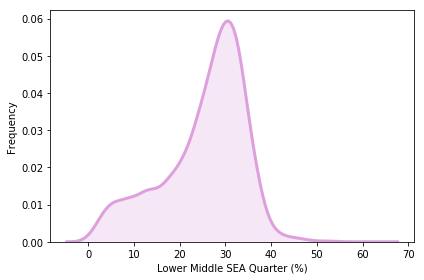

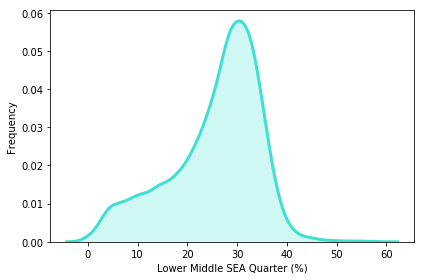

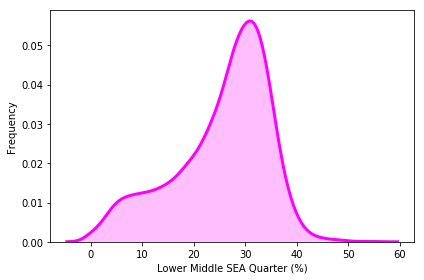

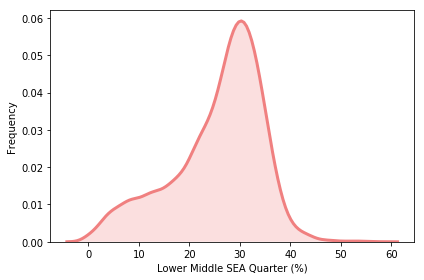

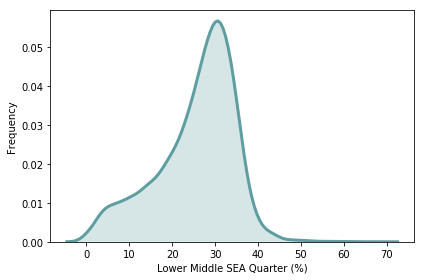

Plotting for -----  Upper Middle SEA Quarter (%)


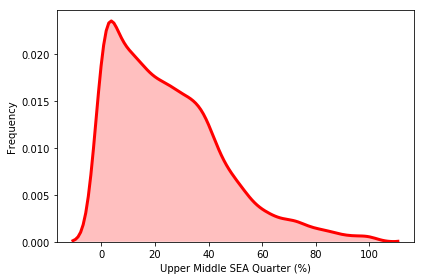

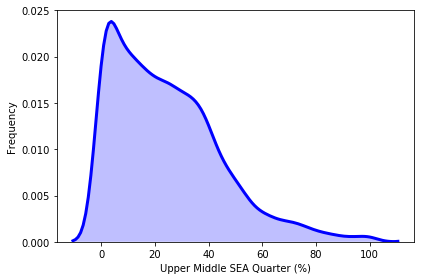

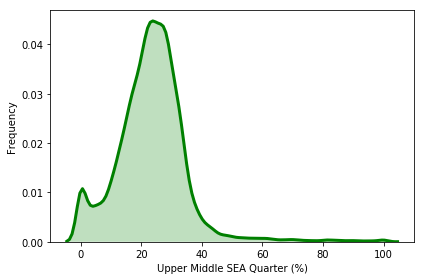

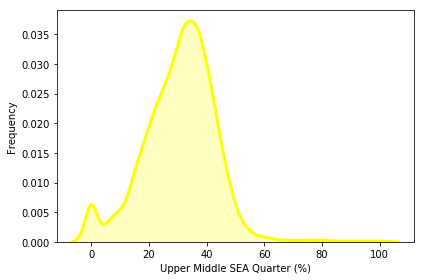

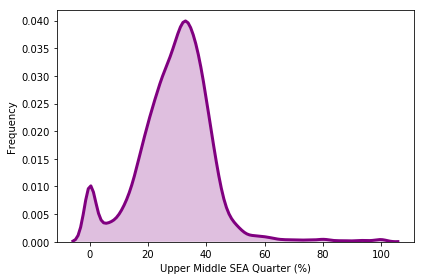

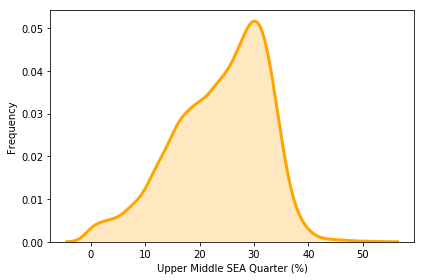

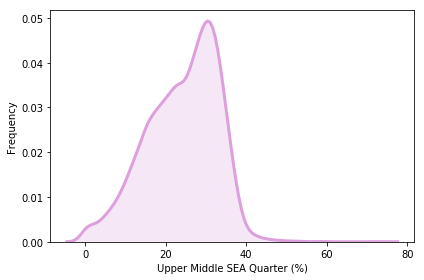

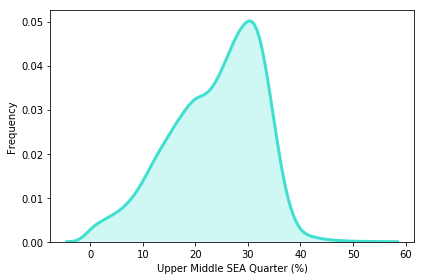

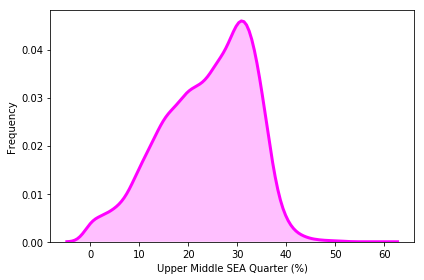

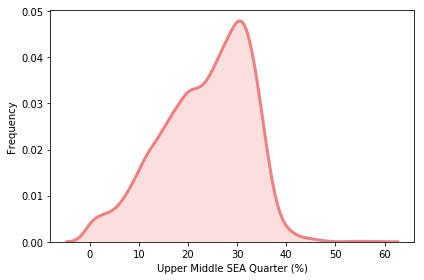

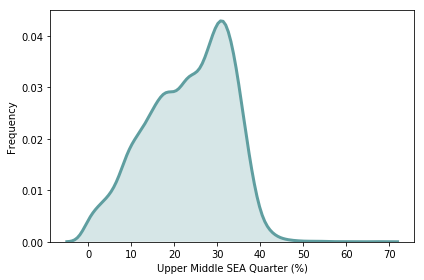

Plotting for -----  Top SEA Quarter (%)


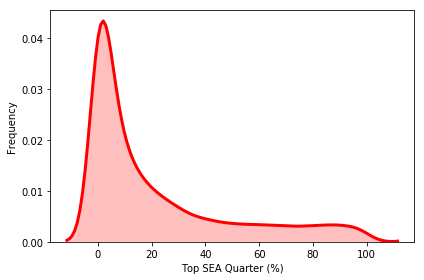

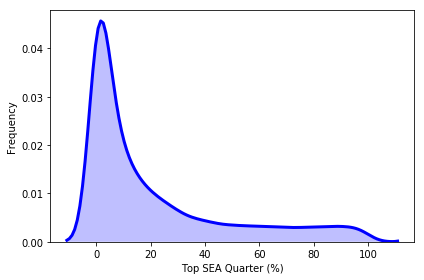

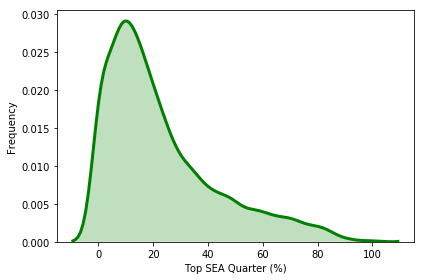

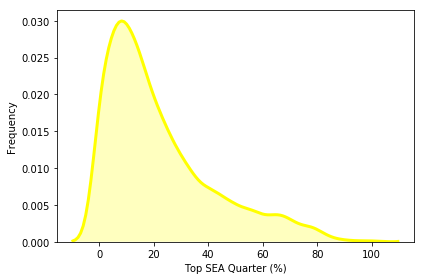

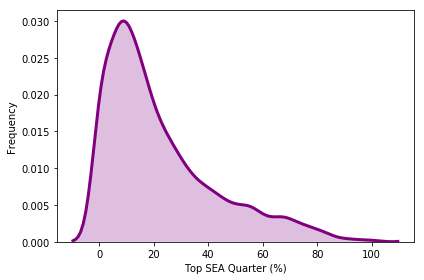

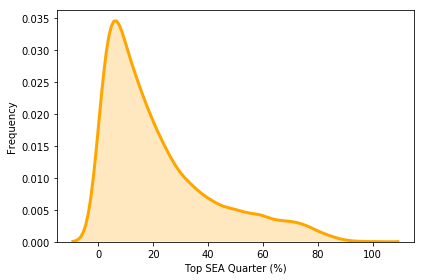

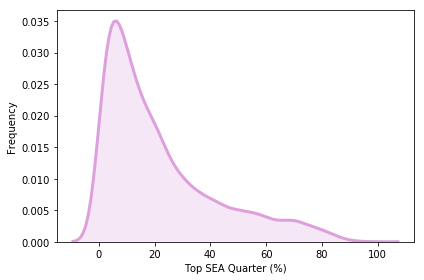

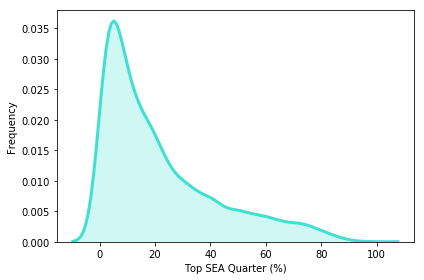

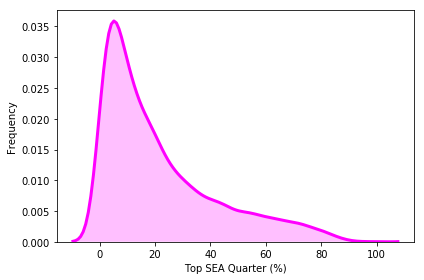

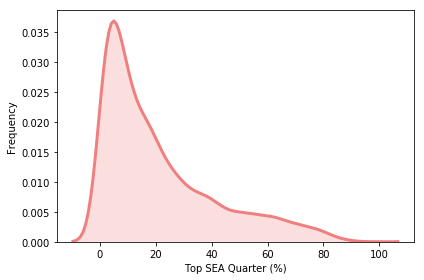

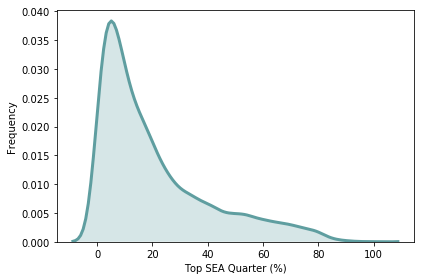

Plotting for -----  Teaching Staff


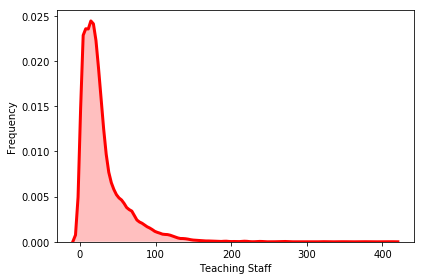

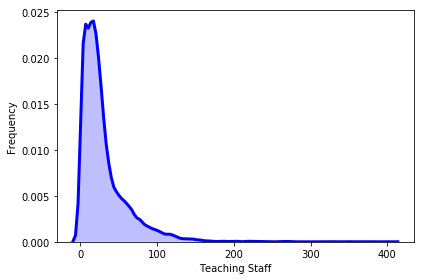

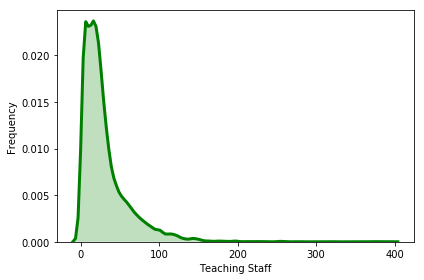

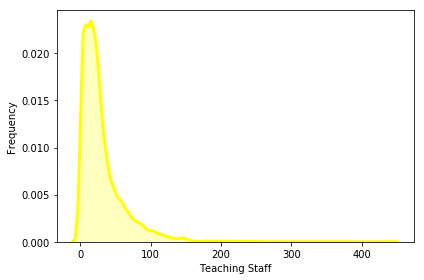

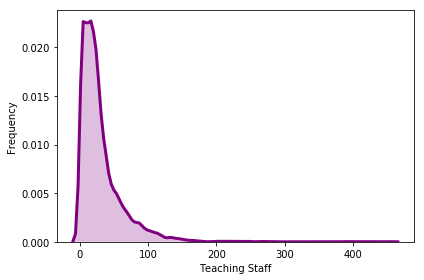

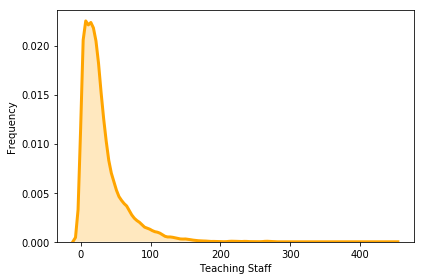

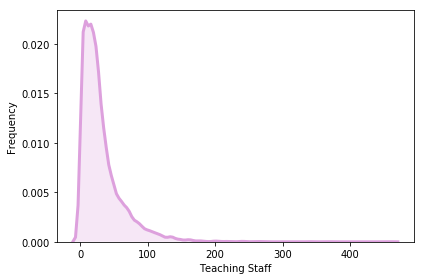

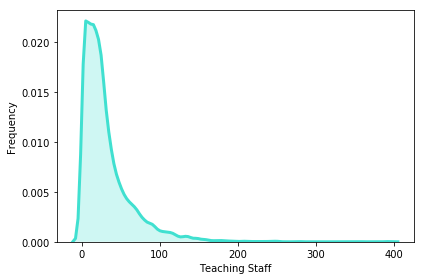

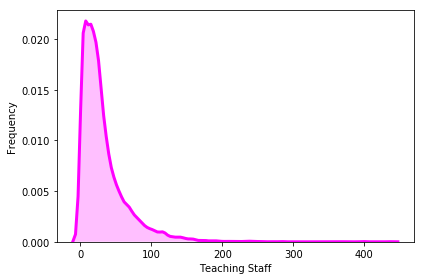

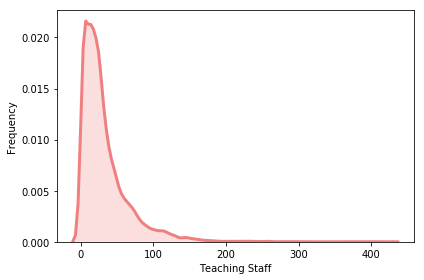

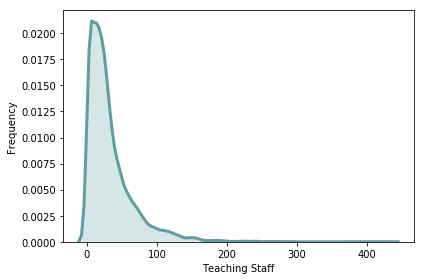

Plotting for -----  Full Time Equivalent Teaching Staff


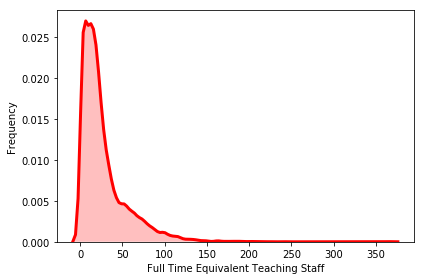

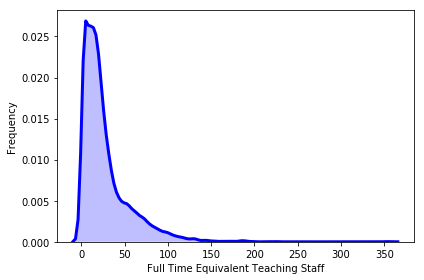

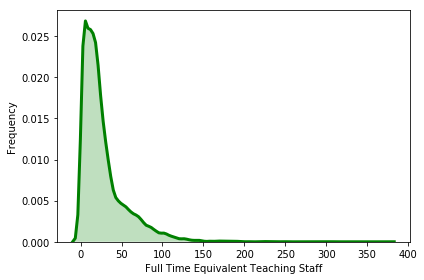

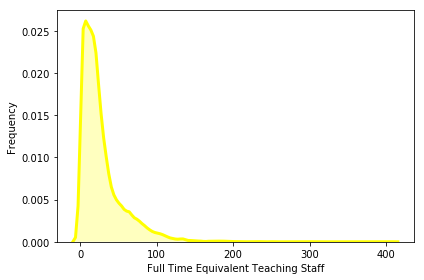

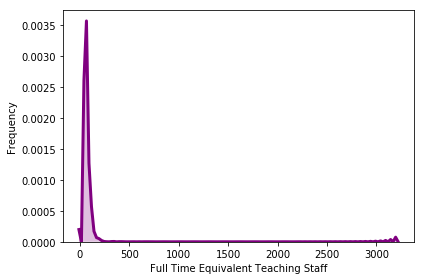

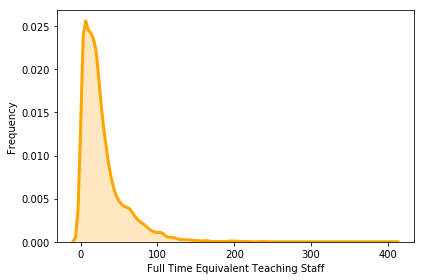

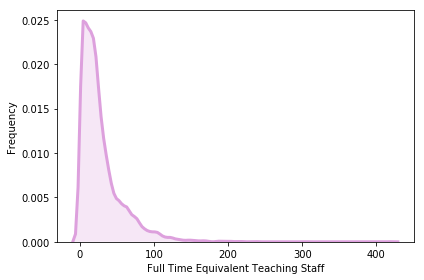

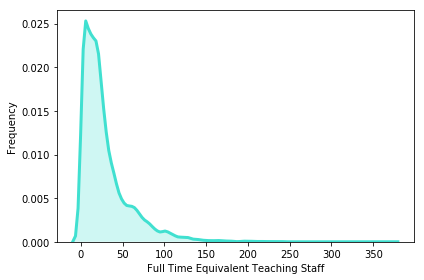

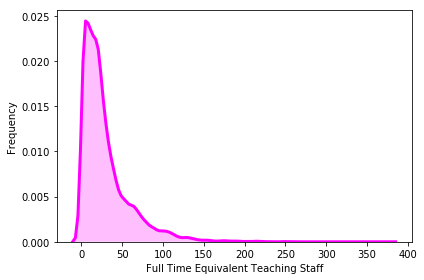

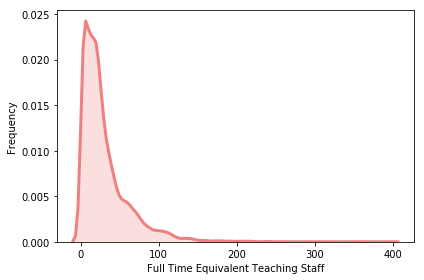

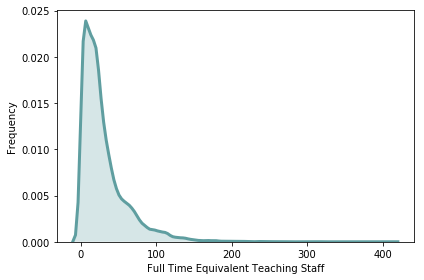

Plotting for -----  Non-Teaching Staff


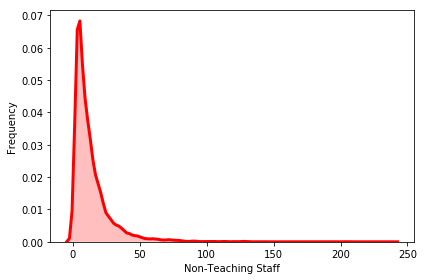

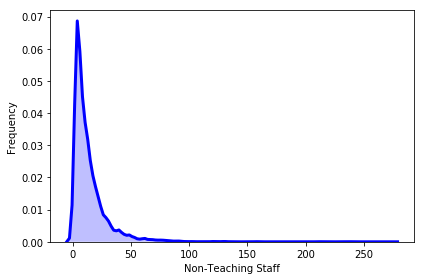

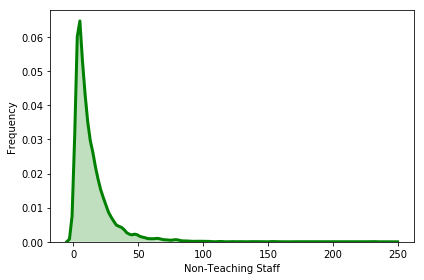

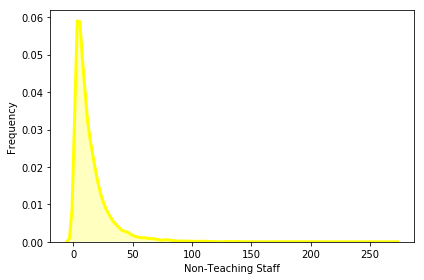

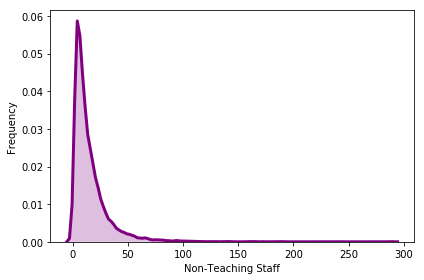

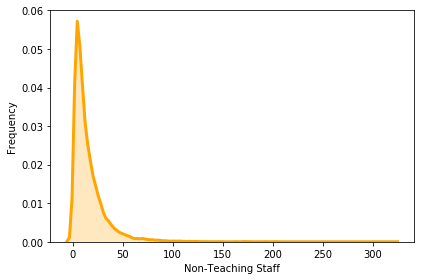

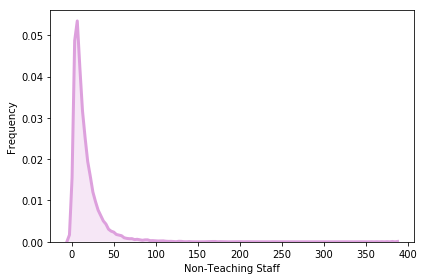

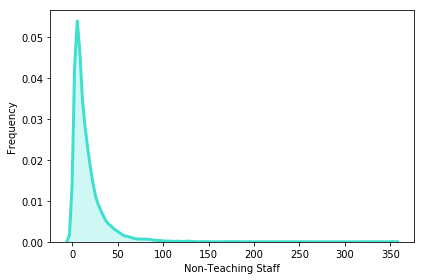

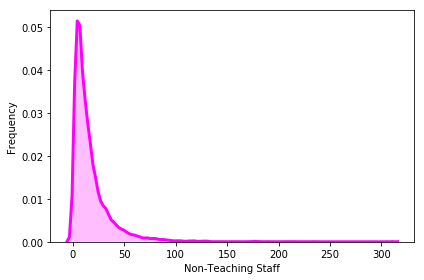

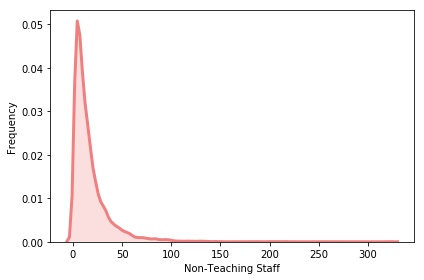

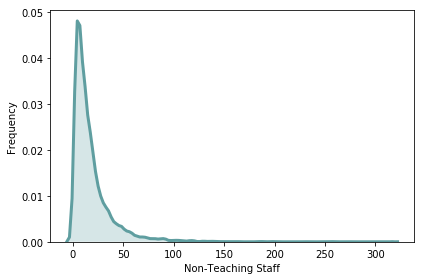

Plotting for -----  Full Time Equivalent Non-Teaching Staff


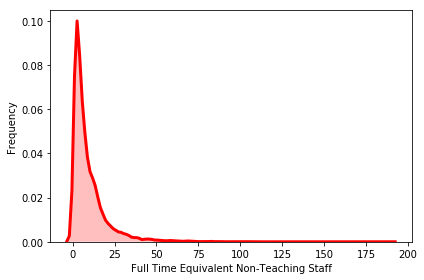

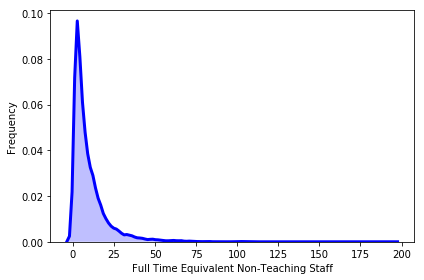

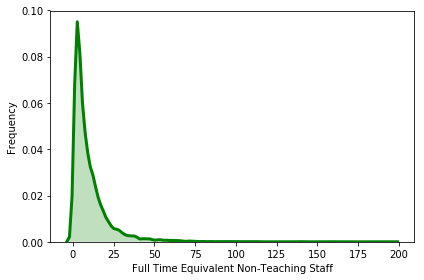

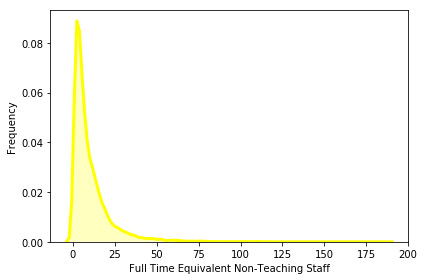

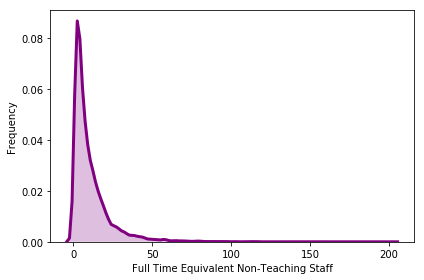

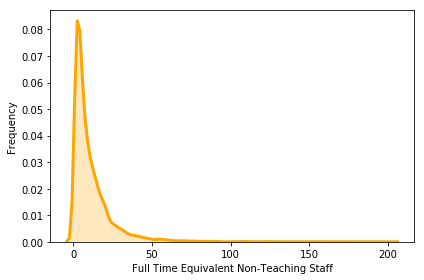

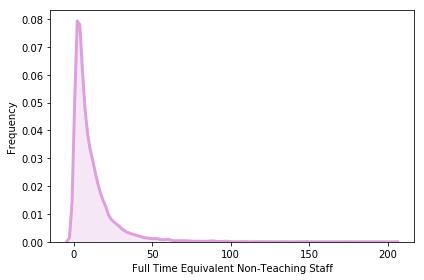

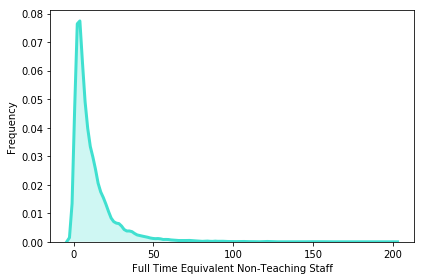

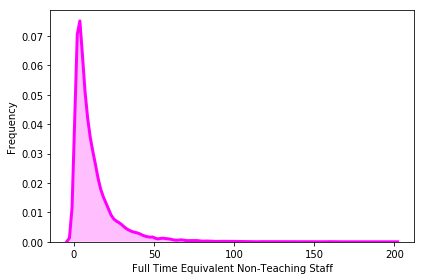

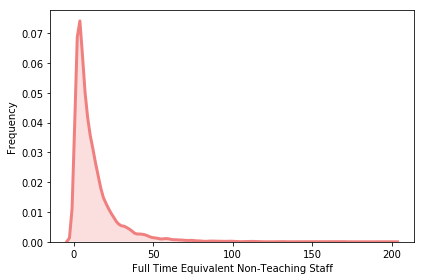

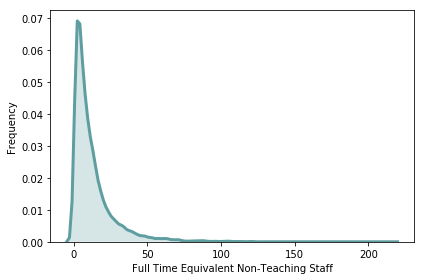

Plotting for -----  Total Enrolments


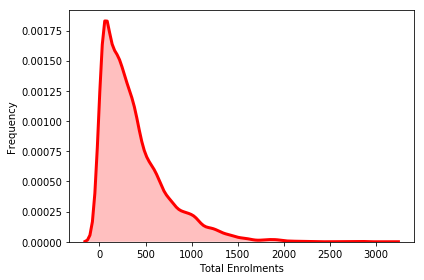

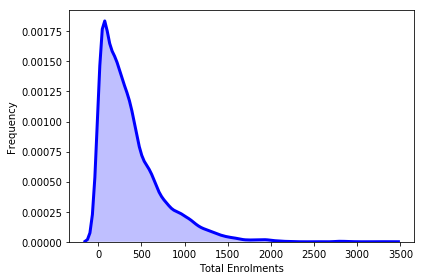

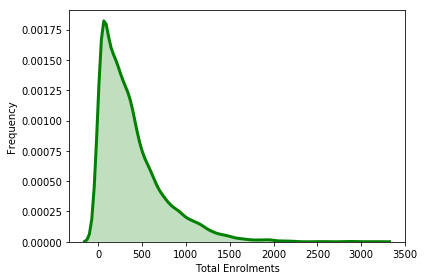

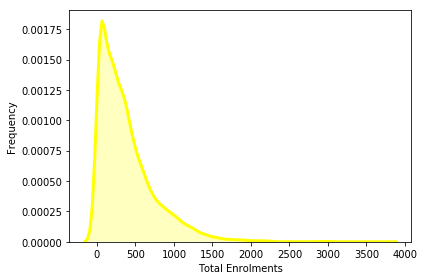

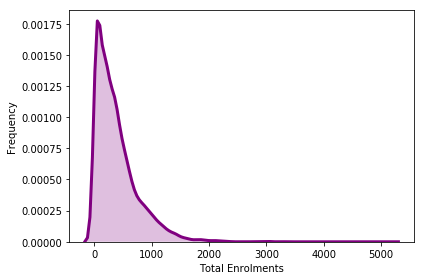

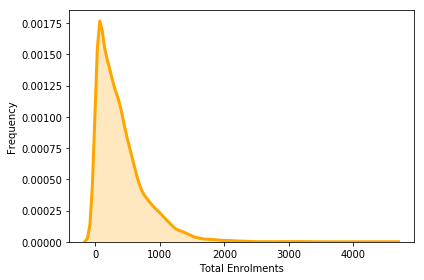

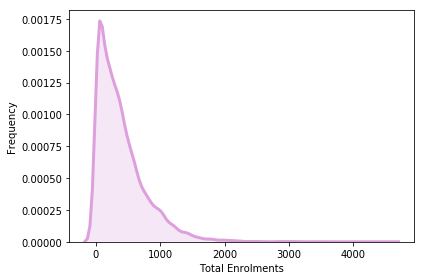

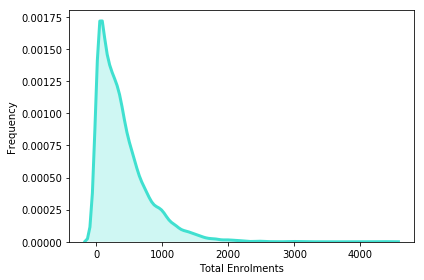

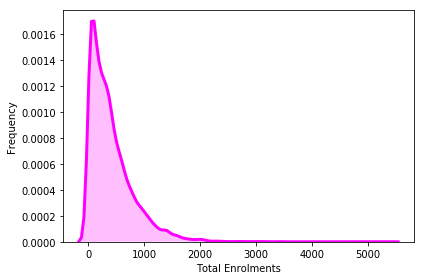

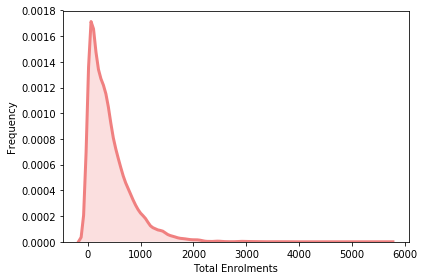

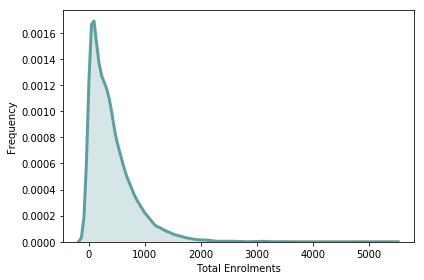

Plotting for -----  Girls Enrolments


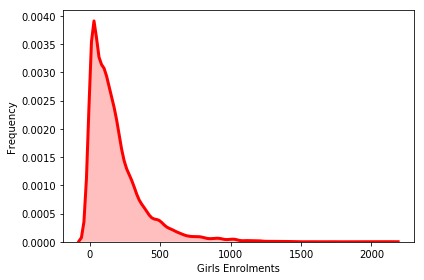

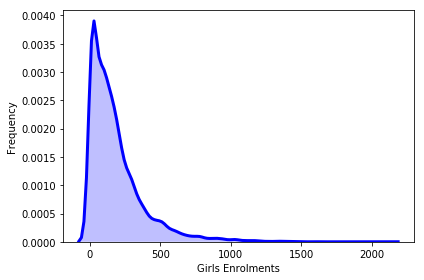

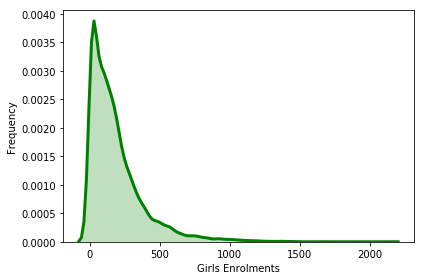

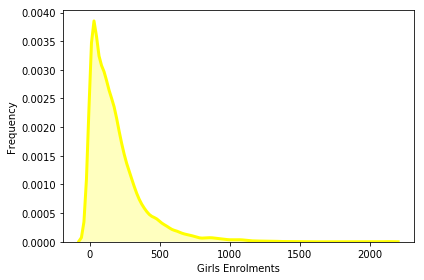

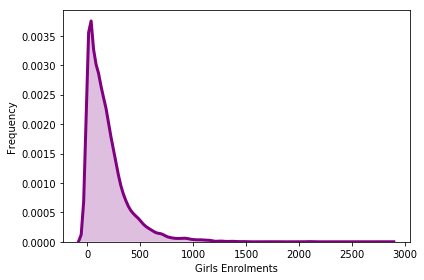

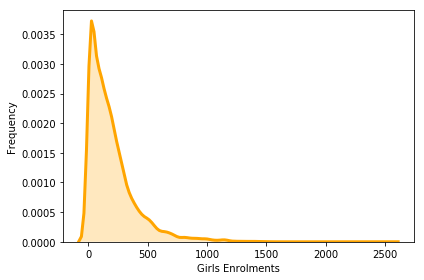

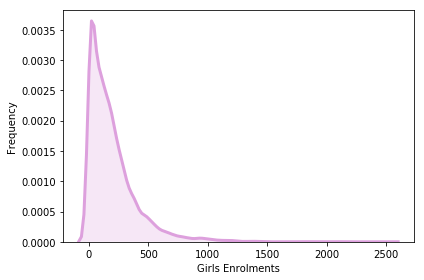

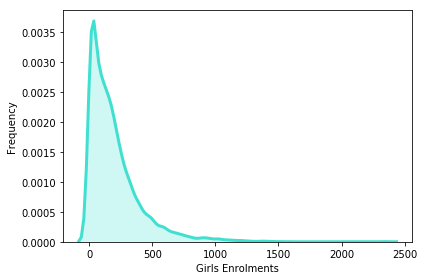

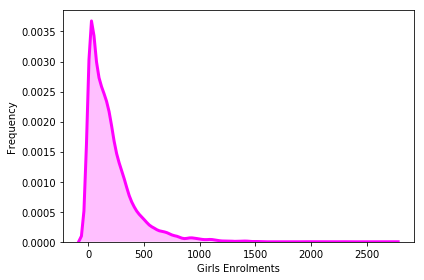

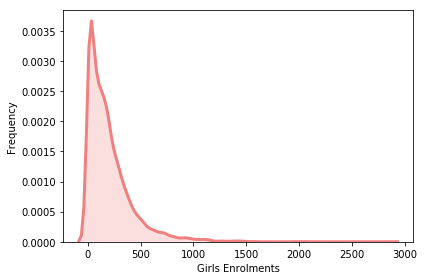

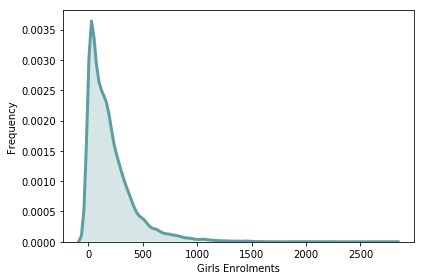

Plotting for -----  Boys Enrolments


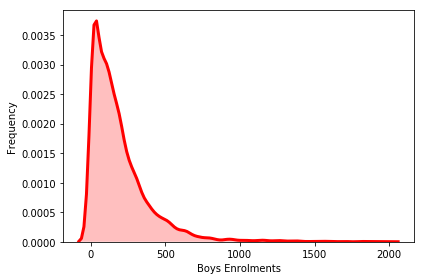

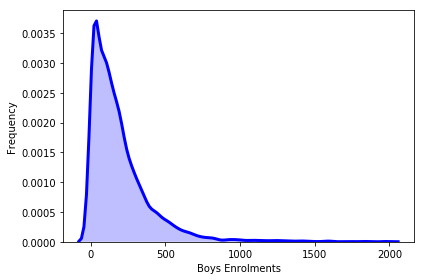

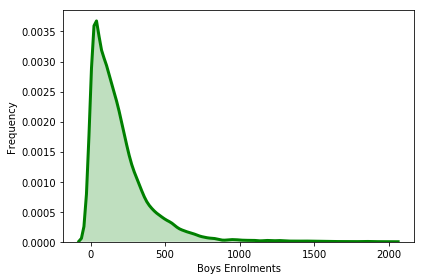

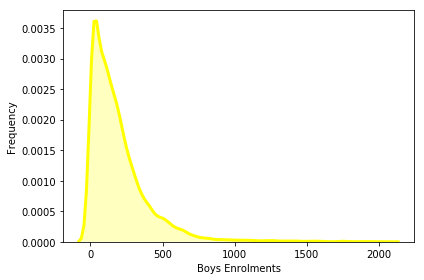

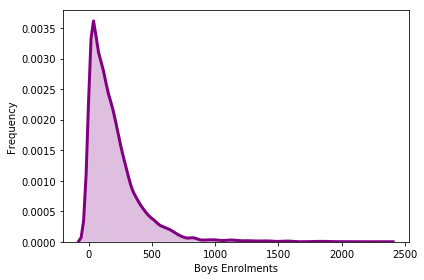

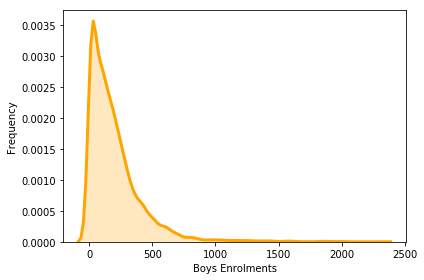

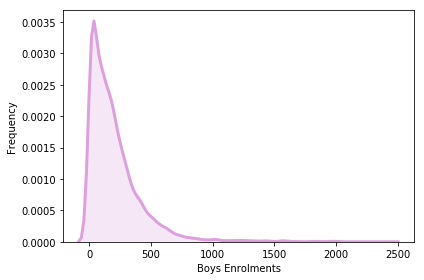

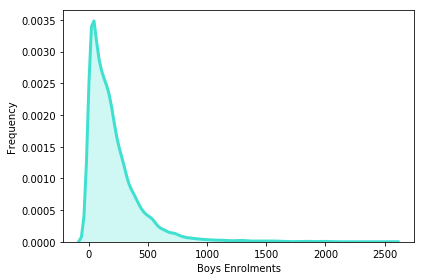

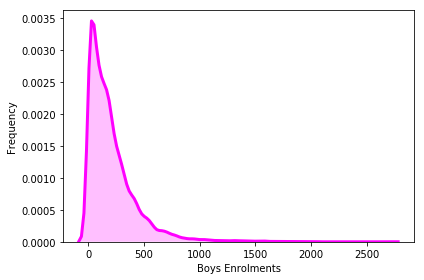

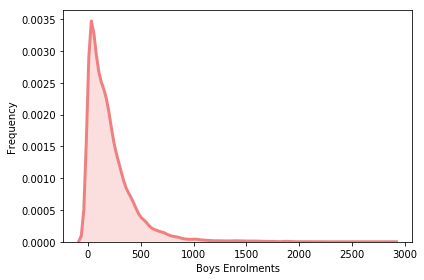

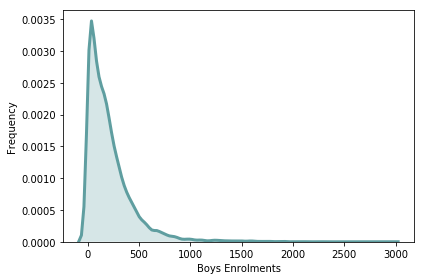

Plotting for -----  Full Time Equivalent Enrolments


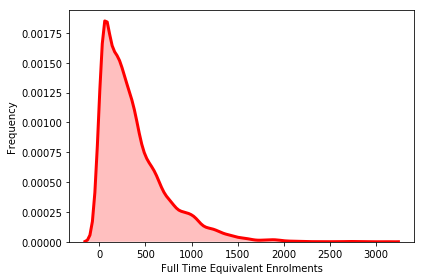

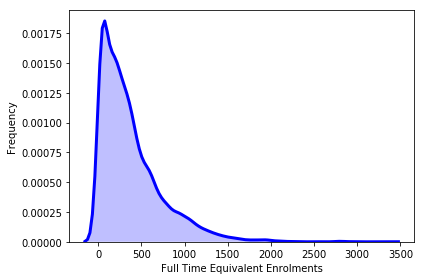

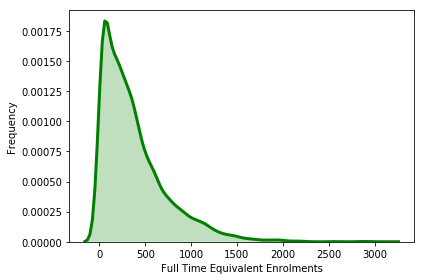

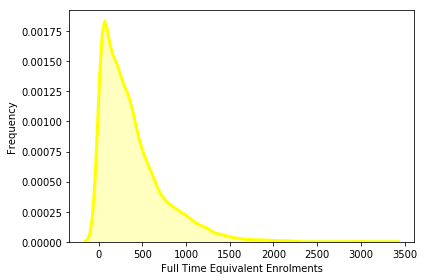

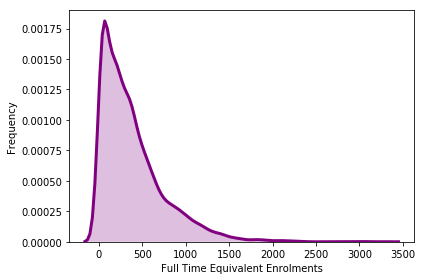

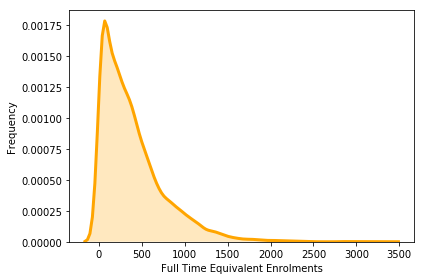

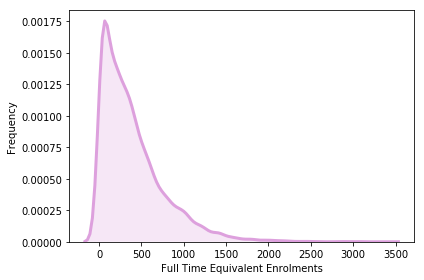

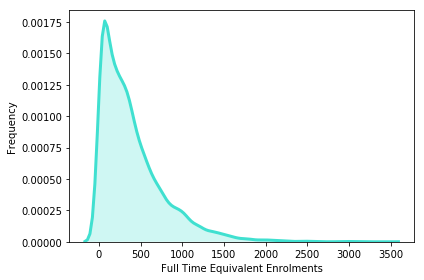

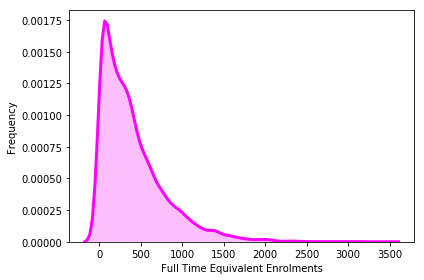

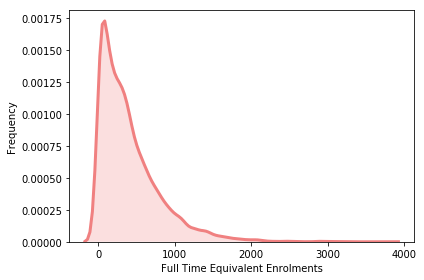

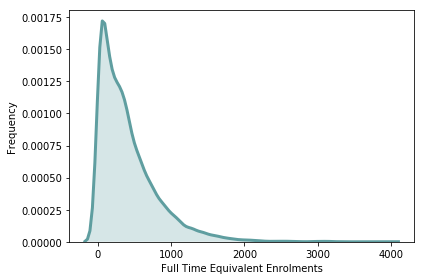

Plotting for -----  Indigenous Enrolments (%)


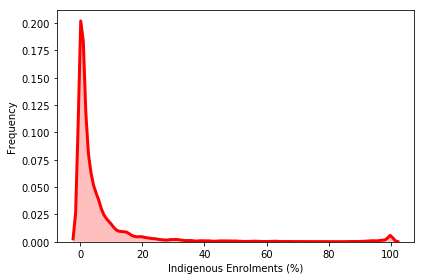

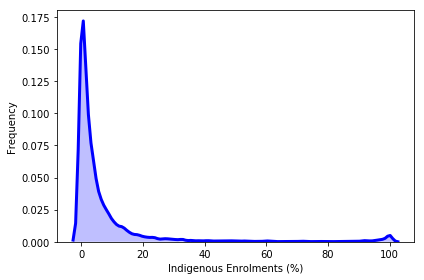

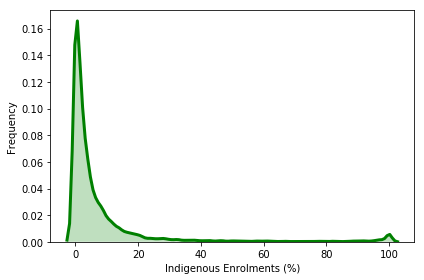

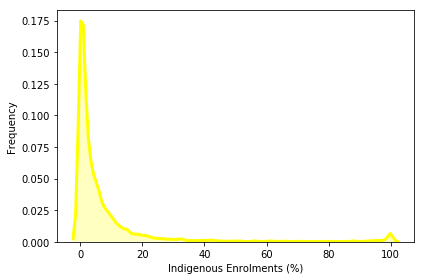

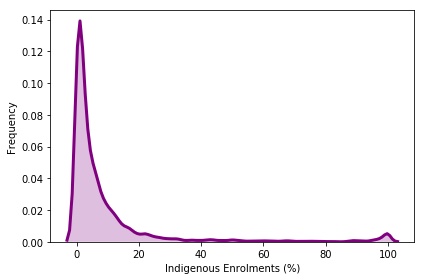

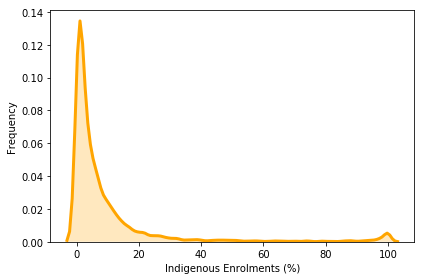

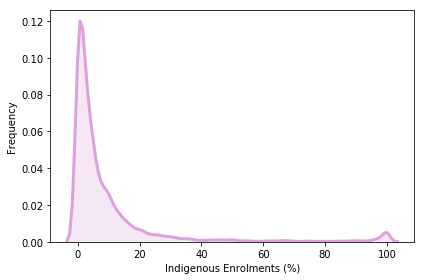

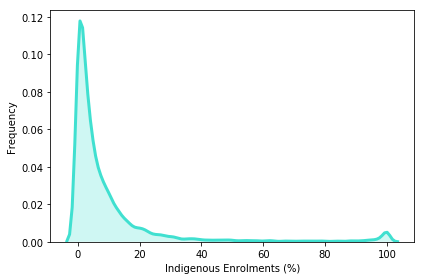

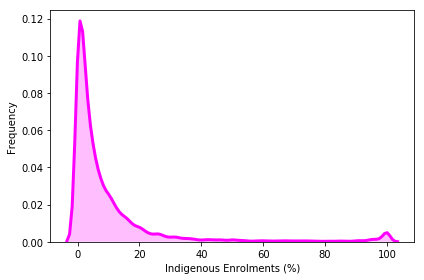

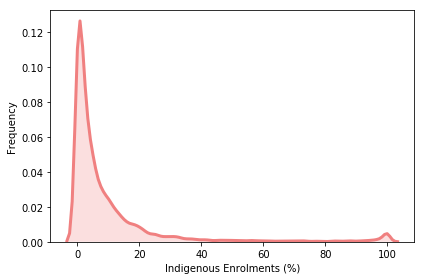

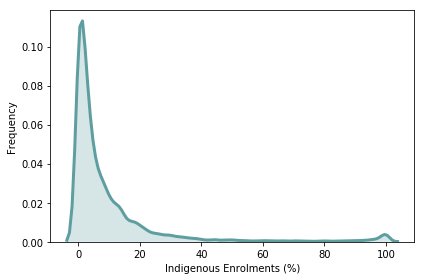

Plotting for -----  Language Background Other Than English (%)


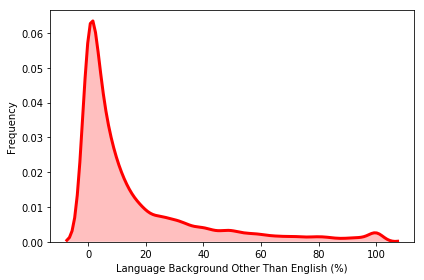

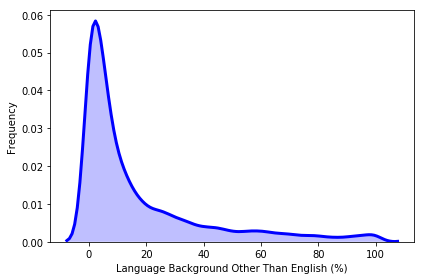

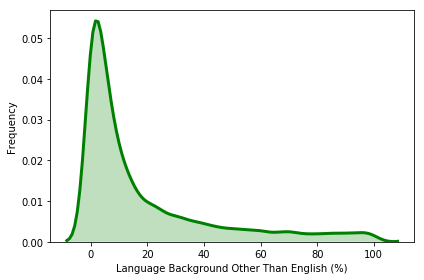

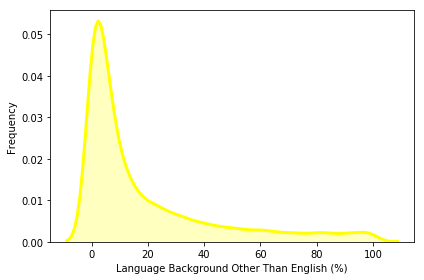

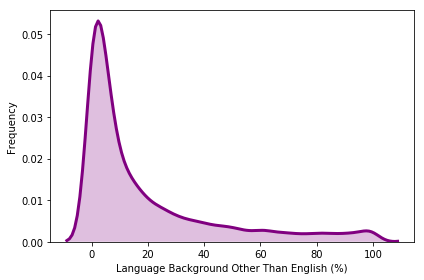

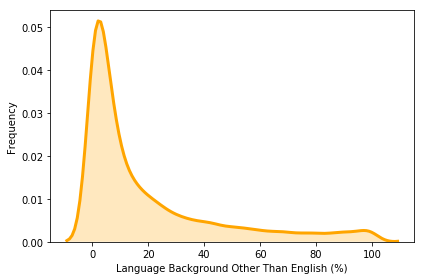

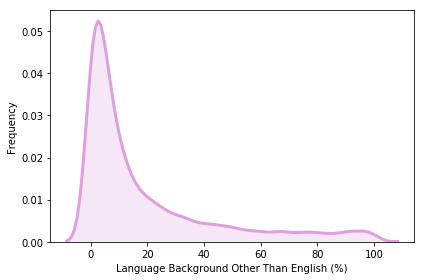

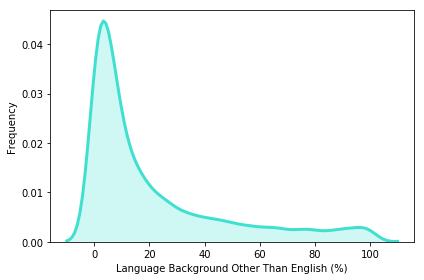

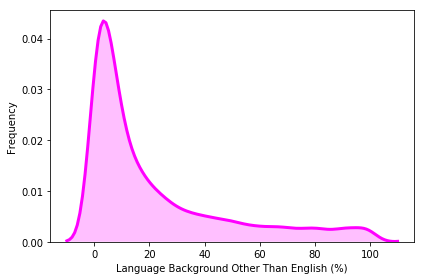

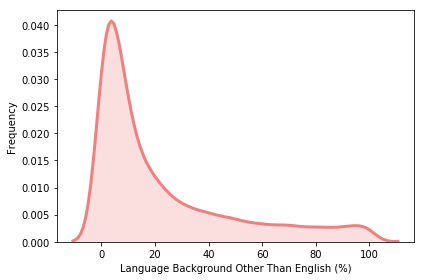

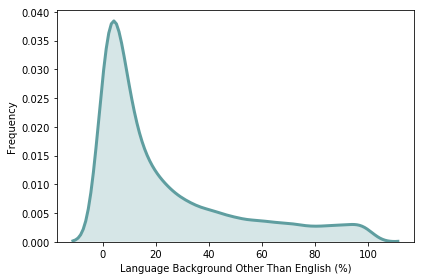

In [25]:
for k in list_params:
    j = 0
    col_dist = ['red', 'blue','green', 'yellow', 'purple', 'orange', 'plum', 'turquoise', 'fuchsia', 'lightcoral', 'cadetblue']
    print('Plotting for ----- ', k)
    for i in year:
        sns.distplot(school_profile[school_profile['Calendar Year'] == i][k], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3}, color = col_dist[j]).set(ylabel = 'Frequency')
        plt.tight_layout()
        plt.show()
        j+=1
    

In [26]:
school_profile.columns

Index(['Calendar Year', 'ACARA SML ID', 'AGE ID', 'School Name', 'Suburb',
       'State', 'Postcode', 'School Sector', 'School Type', 'Campus Type',
       'Rolled Reporting Description', 'School URL', 'Governing Body',
       'Governing Body URL', 'Year Range', 'Geolocation', 'ICSEA',
       'Bottom SEA Quarter (%)', 'Lower Middle SEA Quarter (%)',
       'Upper Middle SEA Quarter (%)', 'Top SEA Quarter (%)', 'Teaching Staff',
       'Full Time Equivalent Teaching Staff', 'Non-Teaching Staff',
       'Full Time Equivalent Non-Teaching Staff', 'Total Enrolments',
       'Girls Enrolments', 'Boys Enrolments',
       'Full Time Equivalent Enrolments', 'Indigenous Enrolments (%)',
       'Language Background Other Than English (%)', 'unique_col'],
      dtype='object')

In [27]:
school_profile['School Type'].unique()

array(['Primary', 'Combined', 'Secondary', 'Special'], dtype=object)

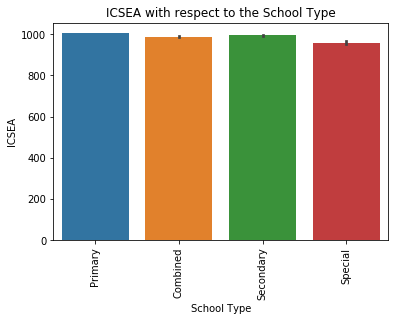

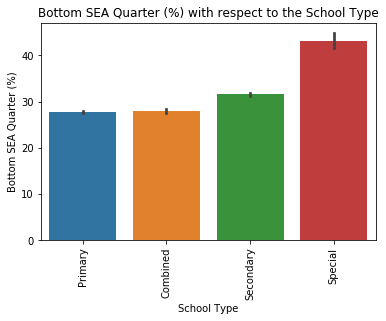

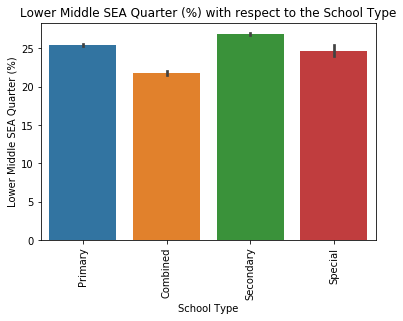

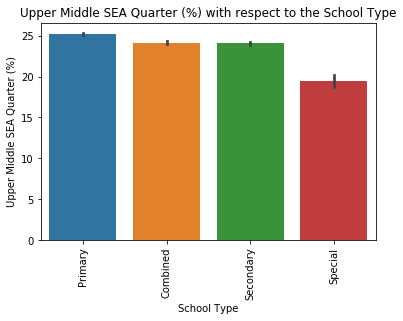

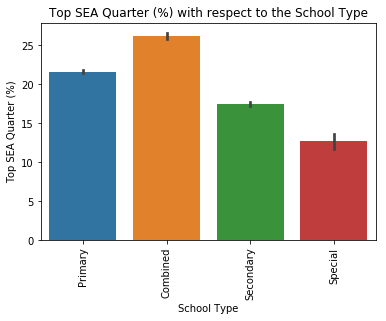

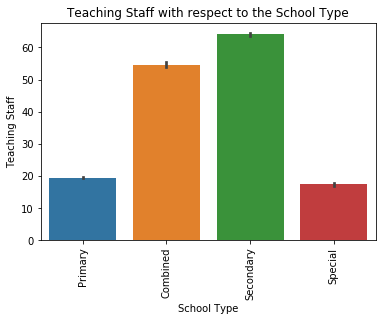

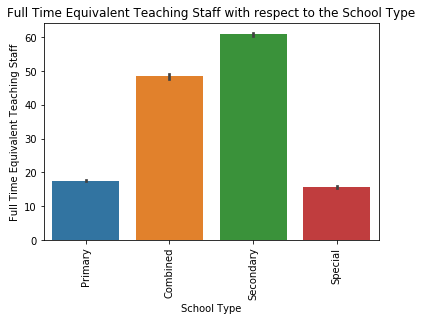

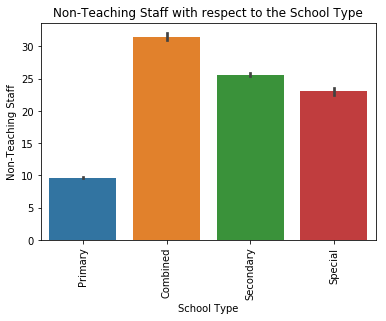

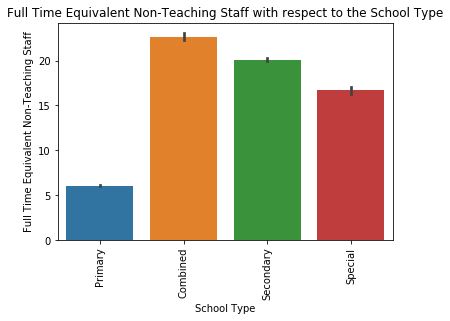

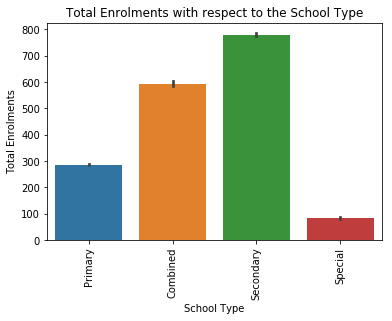

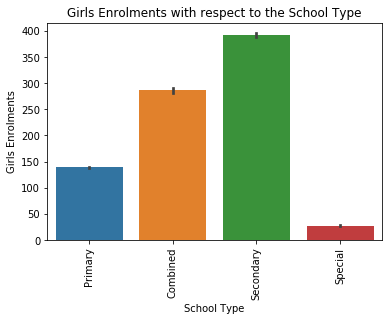

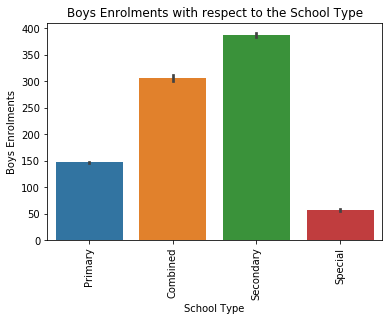

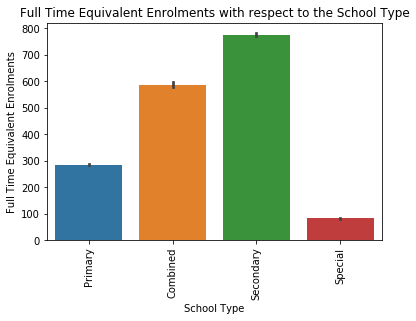

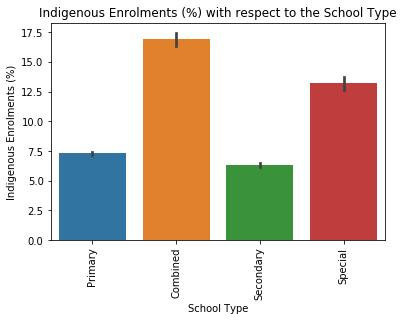

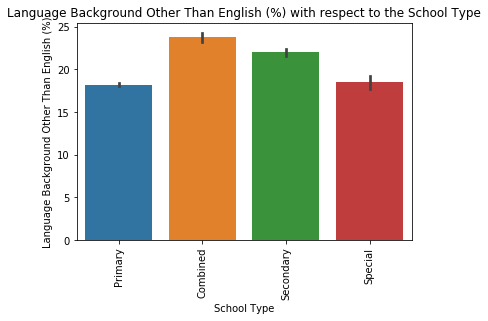

In [28]:
for i in list_params:
    ax = sns.barplot(x=school_profile['School Type'], y=school_profile[i]).set_title( i + ' with respect to the School Type')
    plt.xticks(rotation=90)
    plt.show()

In [29]:
len(school_profile['Governing Body'].unique())

40

In [30]:
school_profile.head()

,Calendar Year,ACARA SML ID,AGE ID,School Name,Suburb,State,Postcode,School Sector,School Type,Campus Type,...,Full Time Equivalent Teaching Staff,Non-Teaching Staff,Full Time Equivalent Non-Teaching Staff,Total Enrolments,Girls Enrolments,Boys Enrolments,Full Time Equivalent Enrolments,Indigenous Enrolments (%),Language Background Other Than English (%),unique_col
0,2008,40000,3.0,Corpus Christi Catholic School,Bellerive,TAS,7018,Catholic,Primary,School Single Entity,...,19.0,12.0,6.9,410.0,185.0,225.0,410.0,1.0,4.0,Corpus Christi Catholic School7018Bellerive
1,2009,40000,3.0,Corpus Christi Catholic School,Bellerive,TAS,7018,Catholic,Primary,School Single Entity,...,19.1,15.0,8.7,409.0,184.0,225.0,409.0,2.0,4.0,Corpus Christi Catholic School7018Bellerive
2,2010,40000,3.0,Corpus Christi Catholic School,Bellerive,TAS,7018,Catholic,Primary,School Single Entity,...,18.6,18.0,10.2,392.0,173.0,219.0,392.0,2.0,4.0,Corpus Christi Catholic School7018Bellerive
3,2011,40000,3.0,Corpus Christi Catholic School,Bellerive,TAS,7018,Catholic,Primary,School Single Entity,...,18.1,16.0,9.0,385.0,173.0,212.0,385.0,0.0,3.0,Corpus Christi Catholic School7018Bellerive
4,2012,40000,3.0,Corpus Christi Catholic School,Bellerive,TAS,7018,Catholic,Primary,School Single Entity,...,18.1,16.0,9.4,391.0,185.0,206.0,391.0,1.0,3.0,Corpus Christi Catholic School7018Bellerive
